This code has been created from following Data School's Youtube scikit-learn kits in the community section of his channel.
https://www.youtube.com/user/dataschool/community

In [2]:
# importing relevent packages
import numpy as np
import pandas as pd
import sklearn
import nltk

In [3]:
#Displaying the version of the imported packages
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The nltk version is {}.'.format(nltk.__version__))

The numpy version is 1.18.1.
The pandas version is 1.0.1.
The scikit-learn version is 0.22.1.
The nltk version is 3.4.5.


In [4]:
# Creating the lists for the data
Fare = [7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583]
Embarked = ["S","C","S","S","S","Q"]
Sex = ["male","female","female","female","male","male"]
Age = [22.0,38.0,26.0,35.0,35.0]

In [5]:
# Converting the lists into Pandas Series
Fare = pd.Series(Fare, name = "Fare")
Embarked = pd.Series(Embarked, name = "Embarked")
Sex = pd.Series(Sex, name = "Sex")
Age = pd.Series(Age, name = "Age")

In [6]:
# Joining all the Pandas Series into a Pandas Dataframe
df = pd.concat([Fare, Embarked, Sex, Age], axis=1)
df

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


# scikit-learn tip \#1
Use ColumnTransformer to apply different preprocessing to different columns:
- select from DataFrame columns by name
- passthrough or drop unspecified columns


In [7]:
# Imorting modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [8]:
# Instantiating the one hot encoder and the simple imputer
ohe = OneHotEncoder()
imp = SimpleImputer()

In [9]:
# Creating an instance of the column transformer
ct = make_column_transformer(
    (ohe, ['Embarked', 'Sex']),
    (imp, ['Age']),
    remainder = 'passthrough')

In [10]:
# fitting and transforming df 
ct.fit_transform(df)

array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 26.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 35.    , 53.1   ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 35.    ,  8.05  ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    , 31.2   ,  8.4583]])

# scikit-learn tip \#2

There are SEVEN ways to select columns using ColumnTransformer:
1. column name
2. integer position
3. slice
4. boolean mask
5. regex pattern
6. dtypes to include
7. dtypes to exclude

In [11]:
# Imorting module

from sklearn.compose import make_column_selector

In [12]:
# all SEVEN of these produce the same results
ct1 = make_column_transformer((ohe, ['Embarked', 'Sex']))
ct2 = make_column_transformer((ohe, [1,2]))
ct3 = make_column_transformer((ohe, slice(1,3)))
ct4 = make_column_transformer((ohe, [False, True, True, False]))
ct5 = make_column_transformer((ohe, make_column_selector(pattern='E|S')))
ct6 = make_column_transformer((ohe, make_column_selector(dtype_include=object)))
ct7 = make_column_transformer((ohe, make_column_selector(dtype_exclude='number')))

In [13]:
# fitting and transforming df using the ct1 instance
ct1.fit_transform(df)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [14]:
# fitting and transforming df using the ct2 instance
ct2.fit_transform(df)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [15]:
# fitting and transforming df using the ct3 instance
ct3.fit_transform(df)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [16]:
# fitting and transforming df using the ct4 instance
ct4.fit_transform(df)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [17]:
# fitting and transforming df using the ct5 instance
ct5.fit_transform(df)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [18]:
# fitting and transforming df using the ct6 instance
ct6.fit_transform(df)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [20]:
# fitting and transforming df using the ct7 instance
ct7.fit_transform(df)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

# scikit-learn tip \#3
Q: What is the difference between the "fit" and "transform" methods?
"fit": transformer learns something about the data
"transform": it uses what it learned to do the data transformation


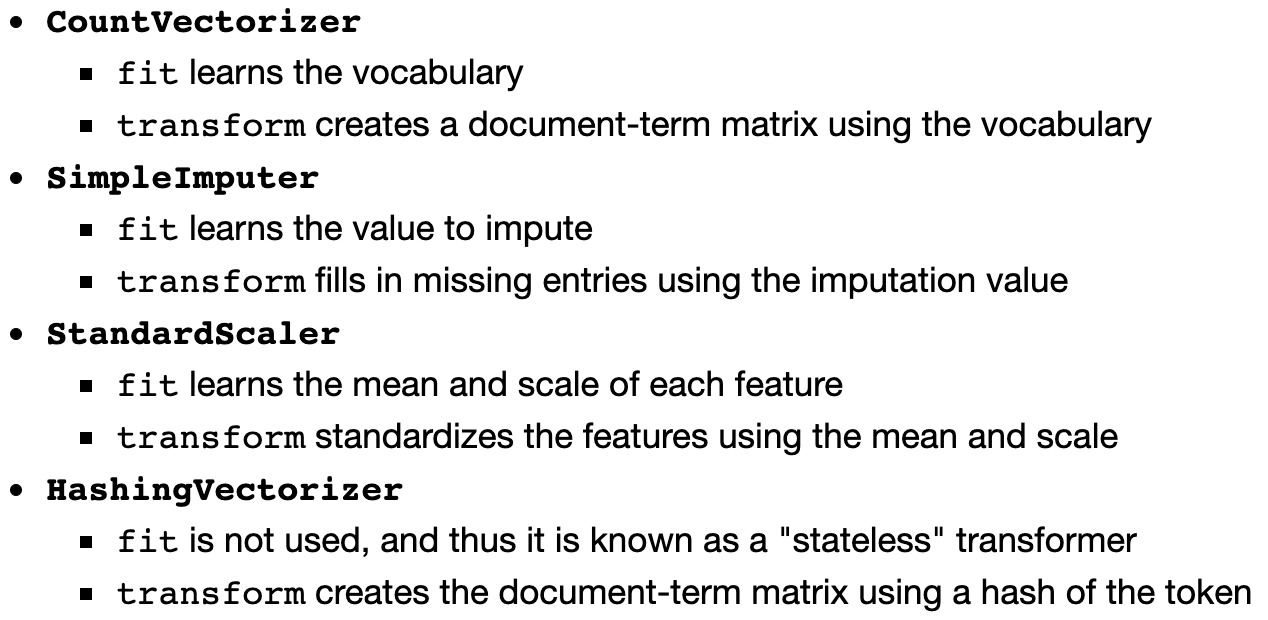

# scikit-learn tip \#4
Use "fit_transform" on training data, but "transform" (only) on testing/new data.
Applies the same transformations to both sets of data, which creates consistent columns and prevents data leakage!﻿



# scikit-learn tip \#5
Reasons to use scikit-learn (not pandas) for ML preprocessing:
1. You can cross-validate the entire workflow
2. You can grid search model & preprocessing hyperparameters
3. Avoids adding new columns to the source DataFrame
4. pandas lacks separate fit/transform steps to prevent data leakage﻿

# scikit-learn tip \#6
Two common ways to encode categorical features:
- OneHotEncoder for unordered (nominal) data
- OrdinalEncoder for ordered (ordinal) data

See example 👇

P.S. LabelEncoder is for labels, not features!﻿

In [21]:
# Creating Pandas Series
Shape = pd.Series(['square', 'square', 'oval', 'circle'], name = 'Shape')
Class = pd.Series(['third', 'first', 'second', 'third'], name = 'Class')
Size = pd.Series(['S', 'S', 'L', 'XL'], name = 'Size')

# Joining all the Pandas Series into a Pandas Dataframe
df2 = pd.concat([Shape, Class, Size], axis=1)
df2
# 'Shape' is unordered, 'Class' and 'Size' are ordered

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [22]:
# importing module
from sklearn.preprocessing import OrdinalEncoder
    

In [23]:
# left-to-right column order is alphabetical (circle, oval, square)
ohe2 = OneHotEncoder(sparse = False)
ohe2.fit_transform(df2[['Shape']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [24]:
# catergory ordering (within each feature) is defined by you
oe = OrdinalEncoder(categories = [['first', 'second', 'third'], ['S', 'M', 'L', 'XL']])
oe.fit_transform(df2[['Class', 'Size']])

array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

# scikit-learn tip \#7
Q: For a one-hot encoded feature, what can you do if new data contains categories that weren't seen during training?
A: Set handle_unknown='ignore' to encode new categories as all zeros.

See example 👇

P.S. If you know all possible categories that might ever appear, you can instead specify the categories manually. handle_unknown='ignore' is useful specifically when you don't know all possible categories.﻿


In [35]:
ohe3 = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [36]:
df3 = pd.DataFrame(['A', 'B', 'C', 'B'], columns = ['cols'])
df3

,cols
0,A
1,B
2,C
3,B


In [37]:
ohe3.fit_transform(df3, [['cols']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [38]:
df4 = pd.DataFrame(['A', 'C', 'D'], columns = ['cols'])
df4

,cols
0,A
1,C
2,D


In [45]:
ohe3.transform(df4)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [44]:
?ohe3.transform

# scikit-learn tip \#1

# scikit-learn tip \#1

# scikit-learn tip \#1

# scikit-learn tip \#1

# scikit-learn tip \#1

# scikit-learn tip \#1